<a href="https://colab.research.google.com/github/hannahchaganti99/HDS5210_InClassHannah/blob/master/Final/Final_Project_Hannah_HDS_5210.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Mental health analysis with respect to students**
# **HDS5210 - 2024 - Final Project**

# **Project Description**

The methodological approach answers the essential question of how student mental health relates to global mental health trends, in terms of the frequency and severity of mental health issues among students compared to the global population. The use of multiple mental health measures including depression, anxiety and panic, in addition to academic measures and treatment seeking behavior offers a more holistic look at the student population’s mental health.
The dataset comprises two main components: an online cross-sectional student mental health survey with 101 responses including data about mental health conditions, academic performance, and treatment-seeking behavior and a global mental health dataset with 6,420 entries across different countries and years. This structure of the dataset allows for the analysis of specific patterns of changes in student mental health at the micro level and for comparison with the global level at the macro level.

The study also seeks to establish correlations between the academic achievement and mental health, gender disparities in the mental health and utilization of services. Moreover, it analyses how student mental health statistics are different from global averages and examines whether characteristics like age and academic performance can determine student mental health.


# **Dataset - Student Mental health - A STATISTICAL RESEARCH ON THE EFFECTS OF MENTAL HEALTH ON STUDENTS’ CGPA dataset**

Link - https://www.kaggle.com/datasets/shariful07/student-mental-health


A STATISTICAL RESEARCH ON THE EFFECTS OF MENTAL HEALTH ON STUDENTS’ CGPA dataset
This Data set was collected by a survey conducted by Google forms from University student in order to examine their current academic situation and mental health. All the data was based on Malaysia and collected from Iium (International Islamic University Malaysia).



# **Data Access and Formats**

In [331]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_1 = pd.read_excel("/content/student_mental_health.xlsx")
df_1.info()
df_1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 23 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   timestamp                                     101 non-null    object 
 1   choose_your_gender                            101 non-null    object 
 2   age                                           100 non-null    float64
 3   what_is_your_course?                          101 non-null    object 
 4   your_current_year_of_study                    101 non-null    object 
 5   what_is_your_cgpa?                            101 non-null    object 
 6   marital_status                                101 non-null    object 
 7   do_you_have_depression?                       101 non-null    object 
 8   do_you_have_anxiety?                          101 non-null    object 
 9   do_you_have_panic_attack?                     101 non-null    obj

,timestamp,choose_your_gender,age,what_is_your_course?,your_current_year_of_study,what_is_your_cgpa?,marital_status,do_you_have_depression?,do_you_have_anxiety?,do_you_have_panic_attack?,...,anxiety,panic_attack,year,cgpa_range,cgpa_min,mental_health_score,sought_treatment,month,month_year,severity_category
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,...,0,1,2020,3.00 - 3.49,3.0,2,0,7,2020-07,Medium
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,...,1,0,2020,3.00 - 3.49,3.0,1,0,7,2020-07,Low
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,...,1,1,2020,3.00 - 3.49,3.0,3,0,7,2020-07,High
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,...,0,0,2020,3.00 - 3.49,3.0,1,0,7,2020-07,Low
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,...,0,0,2020,3.00 - 3.49,3.0,0,0,7,2020-07,Low


# **Data Transformations**

# **Transformation 1**

The first transformation normalizes column names and converts ‘Yes/No’ type of categorical variables to binary (1/0). This makes the data more uniform and easy for machine analysis where spaces in the column names are replaced by underscores and textual responses are converted to numerical form. This is basic data preparation step, which is crucial for the rest analysis procedure.

The second transformation deals with date information by selecting only the year part from the timestamp column. This reduces the complexity of temporal analysis to the year part thus enabling the tracking of annual patterns and comparison with the global data set. In order to format both the date and time properly in the data set, format="mixed" and dayfirst=True parameters are used.

The third transformation processes CGPA (Cumulative Grade Point Average) data by taking the minimum value of the CGPA ranges. It splits the range string and convert it to float, which makes it easy for quantitative analysis especially in the relationship between academic performance and mental health.

The fourth transformation forms an index of mental health by adding the dummy variables of depression, anxiety, and panic attacks. This gives a scale of 0-3 in which a higher value shows more mental health conditions were claimed to be had. While EMA yields dimensional scores for each of the subdomains of mental health, this would/this aggregated score enables one to arrive at the Sumscore, which enables large scale analysis.

The fifth transformation dichotomises the treatment-seeking response like the other mental health variables. This format of treatment seeking behavior (0 for No, 1 for Yes) is more convenient for analysis and to establish the correlation between the treatment seeking behavior and other variables in the dataset for statistical analysis and modeling.

In [332]:
# Transformation 1
def clean_and_standardize_data(df):
    """
    Cleans and standardizes the column names and values in the DataFrame.

    - Converts column names to lowercase and replaces spaces with underscores.
    - Standardizes the 'choose_your_gender' column to lowercase and renames it to 'gender'.
    - Maps responses from 'do_you_have_depression?', 'do_you_have_anxiety?', and
      'do_you_have_panic_attack?' columns to binary values (Yes: 1, No: 0).

    Arguments:
    df: pandas DataFrame
        The input DataFrame with raw data.

    Returns:
    df: pandas DataFrame
        The cleaned and standardized DataFrame.
    """
    # Standardize column names
    df.columns = df.columns.str.lower().str.replace(' ', '_')

    # Standardize 'choose_your_gender' column and rename to 'gender'
    df['gender'] = df['choose_your_gender'].str.lower()

    # Map 'Yes' and 'No' responses to binary values for specific columns
    df['depression'] = df['do_you_have_depression?'].map({'Yes': 1, 'No': 0})
    df['anxiety'] = df['do_you_have_anxiety?'].map({'Yes': 1, 'No': 0})
    df['panic_attack'] = df['do_you_have_panic_attack?'].map({'Yes': 1, 'No': 0})

    return df

# Apply the function and inspect the updated DataFrame
df_1 = clean_and_standardize_data(df_1)
df_1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 23 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   timestamp                                     101 non-null    object 
 1   choose_your_gender                            101 non-null    object 
 2   age                                           100 non-null    float64
 3   what_is_your_course?                          101 non-null    object 
 4   your_current_year_of_study                    101 non-null    object 
 5   what_is_your_cgpa?                            101 non-null    object 
 6   marital_status                                101 non-null    object 
 7   do_you_have_depression?                       101 non-null    object 
 8   do_you_have_anxiety?                          101 non-null    object 
 9   do_you_have_panic_attack?                     101 non-null    obj

# **Test code**

In [333]:
import pandas as pd

def test_clean_and_standardize_data():
    """
    Tests the clean_and_standardize_data function to ensure it correctly cleans and standardizes the DataFrame.
    """
    # Mock input DataFrame
    data = {
        'Choose your Gender': ['Male', 'Female', 'Non-binary'],
        'Do you have depression?': ['Yes', 'No', 'Yes'],
        'Do you have anxiety?': ['No', 'Yes', 'No'],
        'Do you have panic attack?': ['Yes', 'No', 'Yes']
    }
    mock_df = pd.DataFrame(data)

    # Expected output DataFrame
    expected_data = {
        'choose_your_gender': ['Male', 'Female', 'Non-binary'],
        'do_you_have_depression?': ['Yes', 'No', 'Yes'],
        'do_you_have_anxiety?': ['No', 'Yes', 'No'],
        'do_you_have_panic_attack?': ['Yes', 'No', 'Yes'],
        'gender': ['male', 'female', 'non-binary'],
        'depression': [1, 0, 1],
        'anxiety': [0, 1, 0],
        'panic_attack': [1, 0, 1]
    }
    expected_df = pd.DataFrame(expected_data)

    # Apply the function
    result_df = clean_and_standardize_data(mock_df)

    # Assert equality
    assert result_df.equals(expected_df), (
        f"Test failed! Expected:\n{expected_df}\nGot:\n{result_df}"
    )
    print("Test passed: Data cleaned and standardized correctly.")
    print(result_df)

# Define the function being tested
def clean_and_standardize_data(df):
    """
    Cleans and standardizes the column names and values in the DataFrame.
    """
    df.columns = df.columns.str.lower().str.replace(' ', '_')
    df['gender'] = df['choose_your_gender'].str.lower()
    df['depression'] = df['do_you_have_depression?'].map({'Yes': 1, 'No': 0})
    df['anxiety'] = df['do_you_have_anxiety?'].map({'Yes': 1, 'No': 0})
    df['panic_attack'] = df['do_you_have_panic_attack?'].map({'Yes': 1, 'No': 0})
    return df

# Run the test
test_clean_and_standardize_data()



Test passed: Data cleaned and standardized correctly.
  choose_your_gender do_you_have_depression? do_you_have_anxiety?  \
0               Male                     Yes                   No   
1             Female                      No                  Yes   
2         Non-binary                     Yes                   No   

  do_you_have_panic_attack?      gender  depression  anxiety  panic_attack  
0                       Yes        male           1        0             1  
1                        No      female           0        1             0  
2                       Yes  non-binary           1        0             1  


# **Transformation 2**

In [334]:
# Transformation 2
def extract_year_from_mixed_dates(df, column_name):
    """
    Extracts the year from a column with mixed date formats and adds it as a new column.

    - Converts the specified date column to datetime, handling mixed formats.
    - Adds a new column 'year' containing the extracted year from the date.

    Arguments:
    df: pandas DataFrame
        The input DataFrame containing the date column.
    column_name: str
        The name of the column with mixed date formats.

    Returns:
    df: pandas DataFrame
        The DataFrame with an added 'year' column containing the extracted year.
    """
    # Convert the specified column to datetime and extract the year
    df['year'] = pd.to_datetime(df[column_name], format='mixed', dayfirst=True).dt.year

    return df

# Apply the function and inspect the updated DataFrame
df_1 = extract_year_from_mixed_dates(df_1, 'timestamp')
df_1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 23 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   timestamp                                     101 non-null    object 
 1   choose_your_gender                            101 non-null    object 
 2   age                                           100 non-null    float64
 3   what_is_your_course?                          101 non-null    object 
 4   your_current_year_of_study                    101 non-null    object 
 5   what_is_your_cgpa?                            101 non-null    object 
 6   marital_status                                101 non-null    object 
 7   do_you_have_depression?                       101 non-null    object 
 8   do_you_have_anxiety?                          101 non-null    object 
 9   do_you_have_panic_attack?                     101 non-null    obj

## **Test code**

In [335]:
import pandas as pd

def test_extract_year_from_mixed_dates():
    """
    Tests the extract_year_from_mixed_dates function to ensure it correctly extracts
    the year from a column with mixed date formats.
    """
    # Mock input DataFrame
    data = {'timestamp': ['2024-01-15', '15/02/2023', '2022-03-03', None, 'InvalidDate']}
    mock_df = pd.DataFrame(data)

    # Expected output DataFrame
    expected_data = {
        'timestamp': ['2024-01-15', '15/02/2023', '2022-03-03', None, 'InvalidDate'],
        'year': [2024.0, 2023.0, 2022.0, None, None]
    }
    expected_df = pd.DataFrame(expected_data)

    # Apply the function
    result_df = extract_year_from_mixed_dates(mock_df, 'timestamp')

    # Replace NaT with None for comparison
    result_df['year'] = result_df['year'].where(pd.notna(result_df['year']), None)

    # Assert equality
    assert result_df.equals(expected_df), (
        f"Test failed! Expected:\n{expected_df}\nGot:\n{result_df}"
    )
    print("Test passed: Year extracted correctly.")
    print(result_df)

# Define the function being tested
def extract_year_from_mixed_dates(df, column_name):
    """
    Extracts the year from a column with mixed date formats and adds it as a new column.
    """
    def parse_date(date):
        try:
            return pd.to_datetime(date, dayfirst=True).year
        except:
            return None

    df['year'] = df[column_name].apply(parse_date)
    return df

# Run the test
test_extract_year_from_mixed_dates()




Test passed: Year extracted correctly.
     timestamp    year
0   2024-01-15  2024.0
1   15/02/2023  2023.0
2   2022-03-03  2022.0
3         None     NaN
4  InvalidDate     NaN


<ipython-input-335-b6be09c5d3d7>:39: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  return pd.to_datetime(date, dayfirst=True).year


# **Transformation 3**

In [336]:
# Transformation 3
def clean_cgpa_data(df, column_name):
    """
    Cleans and extracts CGPA range data from a column.

    - Creates a new column 'cgpa_range' to store the original CGPA range values.
    - Extracts the minimum CGPA value from the range and stores it in a new column 'cgpa_min'.

    Arguments:
    df: pandas DataFrame
        The input DataFrame containing CGPA data.
    column_name: str
        The name of the column with CGPA ranges.

    Returns:
    df: pandas DataFrame
        The DataFrame with added 'cgpa_range' and 'cgpa_min' columns.
    """
    # Create a new column for CGPA range
    df['cgpa_range'] = df[column_name]

    # Extract the minimum CGPA from the range and convert to float
    df['cgpa_min'] = df['cgpa_range'].str.split('-').str[0].astype(float)

    return df

# Apply the function and inspect the updated DataFrame
df_1 = clean_cgpa_data(df_1, 'what_is_your_cgpa?')
df_1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 23 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   timestamp                                     101 non-null    object 
 1   choose_your_gender                            101 non-null    object 
 2   age                                           100 non-null    float64
 3   what_is_your_course?                          101 non-null    object 
 4   your_current_year_of_study                    101 non-null    object 
 5   what_is_your_cgpa?                            101 non-null    object 
 6   marital_status                                101 non-null    object 
 7   do_you_have_depression?                       101 non-null    object 
 8   do_you_have_anxiety?                          101 non-null    object 
 9   do_you_have_panic_attack?                     101 non-null    obj

# **Test code**

In [337]:
import pandas as pd

def test_clean_cgpa_data():
    """
    Tests the clean_cgpa_data function to ensure it correctly processes CGPA range data.
    """
    # Mock input DataFrame
    data = {
        'what_is_your_cgpa?': ['3.5-4.0', '2.0-3.0', '3.0-3.5', '1.5-2.0']
    }
    mock_df = pd.DataFrame(data)

    # Expected output DataFrame
    expected_data = {
        'what_is_your_cgpa?': ['3.5-4.0', '2.0-3.0', '3.0-3.5', '1.5-2.0'],
        'cgpa_range': ['3.5-4.0', '2.0-3.0', '3.0-3.5', '1.5-2.0'],
        'cgpa_min': [3.5, 2.0, 3.0, 1.5]
    }
    expected_df = pd.DataFrame(expected_data)

    # Apply the function
    result_df = clean_cgpa_data(mock_df, 'what_is_your_cgpa?')

    # Assert equality
    assert result_df.equals(expected_df), (
        f"Test failed! Expected:\n{expected_df}\nGot:\n{result_df}"
    )
    print("Test passed: CGPA data cleaned correctly.")
    print(result_df)

# Define the function being tested
def clean_cgpa_data(df, column_name):
    """
    Cleans and extracts CGPA range data from a column.
    """
    df['cgpa_range'] = df[column_name]
    df['cgpa_min'] = df['cgpa_range'].str.split('-').str[0].astype(float)
    return df

# Run the test
test_clean_cgpa_data()



Test passed: CGPA data cleaned correctly.
  what_is_your_cgpa? cgpa_range  cgpa_min
0            3.5-4.0    3.5-4.0       3.5
1            2.0-3.0    2.0-3.0       2.0
2            3.0-3.5    3.0-3.5       3.0
3            1.5-2.0    1.5-2.0       1.5


# **Transformation 4**

In [338]:
# Transformation 4
def calculate_mental_health_score(df, columns):
    """
    Calculates a mental health score for each individual on a 0-3 scale.

    - Sums the binary values (0 or 1) in the specified columns to create the score.
    - Adds a new column 'mental_health_score' representing the score for each row.

    Arguments:
    df: pandas DataFrame
        The input DataFrame containing the mental health-related columns.
    columns: list of str
        The list of column names to include in the score calculation.

    Returns:
    df: pandas DataFrame
        The DataFrame with an added 'mental_health_score' column.
    """
    # Calculate the mental health score by summing the specified columns
    df['mental_health_score'] = df[columns].sum(axis=1)

    return df

# Apply the function and inspect the updated DataFrame
mental_health_columns = ['depression', 'anxiety', 'panic_attack']
df_1 = calculate_mental_health_score(df_1, mental_health_columns)
df_1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 23 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   timestamp                                     101 non-null    object 
 1   choose_your_gender                            101 non-null    object 
 2   age                                           100 non-null    float64
 3   what_is_your_course?                          101 non-null    object 
 4   your_current_year_of_study                    101 non-null    object 
 5   what_is_your_cgpa?                            101 non-null    object 
 6   marital_status                                101 non-null    object 
 7   do_you_have_depression?                       101 non-null    object 
 8   do_you_have_anxiety?                          101 non-null    object 
 9   do_you_have_panic_attack?                     101 non-null    obj

# **Test code**

In [339]:
import pandas as pd

def test_calculate_mental_health_score():
    """
    Tests the calculate_mental_health_score function to ensure it correctly calculates
    the mental health score based on specified columns.
    """
    # Mock input DataFrame
    data = {
        'depression': [1, 0, 1, 1],
        'anxiety': [0, 1, 0, 1],
        'panic_attack': [1, 0, 1, 1]
    }
    mock_df = pd.DataFrame(data)

    # Expected output DataFrame
    expected_data = {
        'depression': [1, 0, 1, 1],
        'anxiety': [0, 1, 0, 1],
        'panic_attack': [1, 0, 1, 1],
        'mental_health_score': [2, 1, 2, 3]
    }
    expected_df = pd.DataFrame(expected_data)

    # Apply the function
    result_df = calculate_mental_health_score(mock_df, ['depression', 'anxiety', 'panic_attack'])

    # Assert equality
    assert result_df.equals(expected_df), (
        f"Test failed! Expected:\n{expected_df}\nGot:\n{result_df}"
    )
    print("Test passed: Mental health score calculated correctly.")
    print(result_df)

# Define the function being tested
def calculate_mental_health_score(df, columns):
    """
    Calculates a mental health score for each individual on a 0-3 scale.
    """
    df['mental_health_score'] = df[columns].sum(axis=1)
    return df

# Run the test
test_calculate_mental_health_score()



Test passed: Mental health score calculated correctly.
   depression  anxiety  panic_attack  mental_health_score
0           1        0             1                    2
1           0        1             0                    1
2           1        0             1                    2
3           1        1             1                    3


# **Transformation 5**

In [340]:
# Transformation 5
def create_treatment_seeking_indicator(df, column_name):
    """
    Creates a binary indicator column for treatment-seeking behavior.

    - Converts the responses in the specified column to binary values (1 for 'Yes', 0 otherwise).
    - Adds a new column 'sought_treatment' to represent the indicator.

    Arguments:
    df: pandas DataFrame
        The input DataFrame containing the treatment-seeking data.
    column_name: str
        The name of the column with responses indicating treatment-seeking behavior.

    Returns:
    df: pandas DataFrame
        The DataFrame with the added 'sought_treatment' column.
    """
    # Create the binary indicator for treatment-seeking behavior
    df['sought_treatment'] = (df[column_name] == 'Yes').astype(int)

    return df

# Apply the function and inspect the updated DataFrame
df_1 = create_treatment_seeking_indicator(df_1, 'did_you_seek_any_specialist_for_a_treatment?')
df_1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 23 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   timestamp                                     101 non-null    object 
 1   choose_your_gender                            101 non-null    object 
 2   age                                           100 non-null    float64
 3   what_is_your_course?                          101 non-null    object 
 4   your_current_year_of_study                    101 non-null    object 
 5   what_is_your_cgpa?                            101 non-null    object 
 6   marital_status                                101 non-null    object 
 7   do_you_have_depression?                       101 non-null    object 
 8   do_you_have_anxiety?                          101 non-null    object 
 9   do_you_have_panic_attack?                     101 non-null    obj

# **Test code**

In [341]:
import pandas as pd

def test_create_treatment_seeking_indicator():
    """
    Tests the create_treatment_seeking_indicator function to ensure it correctly creates
    a binary indicator column for treatment-seeking behavior.
    """
    # Mock input DataFrame
    data = {
        'did_you_seek_any_specialist_for_a_treatment?': ['Yes', 'No', 'Yes', 'No', None]
    }
    mock_df = pd.DataFrame(data)

    # Expected output DataFrame
    expected_data = {
        'did_you_seek_any_specialist_for_a_treatment?': ['Yes', 'No', 'Yes', 'No', None],
        'sought_treatment': [1, 0, 1, 0, 0]
    }
    expected_df = pd.DataFrame(expected_data)

    # Apply the function
    result_df = create_treatment_seeking_indicator(mock_df, 'did_you_seek_any_specialist_for_a_treatment?')

    # Assert equality
    assert result_df.equals(expected_df), (
        f"Test failed! Expected:\n{expected_df}\nGot:\n{result_df}"
    )
    print("Test passed: Binary indicator for treatment-seeking behavior created correctly.")
    print(result_df)

# Define the function being tested
def create_treatment_seeking_indicator(df, column_name):
    """
    Creates a binary indicator column for treatment-seeking behavior.
    """
    df['sought_treatment'] = (df[column_name] == 'Yes').astype(int)
    return df

# Run the test
test_create_treatment_seeking_indicator()



Test passed: Binary indicator for treatment-seeking behavior created correctly.
  did_you_seek_any_specialist_for_a_treatment?  sought_treatment
0                                          Yes                 1
1                                           No                 0
2                                          Yes                 1
3                                           No                 0
4                                         None                 0


# **Dataset - Mental Health - Mental health is an essential part of people’s lives and society**.

Link - https://www.kaggle.com/datasets/imtkaggleteam/mental-health

Mental health is an essential part of people’s lives and society. Poor mental health affects our well-being, our ability to work, and our relationships with friends, family, and community. Mental health conditions are not uncommon. Hundreds of millions suffer from them yearly, and many more do over their lifetimes. It’s estimated that 1 in 3 women and 1 in 5 men will experience major depression in their lives. Other conditions, such as schizophrenia and bipolar disorder, are less common but still have a large impact on people’s lives. Aside from the formal diagnoses, mental illnesses can be measured using surveys and screening questionnaires. These tend to ask people about symptoms similar to those in diagnostic manuals, but they can be used more easily and widely because the data does not need to be collected by a healthcare professional.

In [342]:
df_2 = pd.read_csv("/content/1- mental-illnesses-prevalence.csv")
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6420 entries, 0 to 6419
Data columns (total 8 columns):
 #   Column                                                                             Non-Null Count  Dtype  
---  ------                                                                             --------------  -----  
 0   Entity                                                                             6420 non-null   object 
 1   Code                                                                               6150 non-null   object 
 2   Year                                                                               6420 non-null   int64  
 3   Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized  6420 non-null   float64
 4   Depressive disorders (share of population) - Sex: Both - Age: Age-standardized     6420 non-null   float64
 5   Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized        6420 non-null   float6

# **Data Transformations**

The first transformation involves cleaning the column names by using split on parentheses to remove any extra text, converting to lower case and replacing space with underscore. This generates more manageable and uniform column names that are less problematic in code and is especially useful as the original column names included detailed descriptions in parentheses.

The second transformation sums all the disorder columns (schizophrenia, depression, anxiety, bipolar, and eating disorders) to give a total mental health burden. This leads to the creation of a single measure of the total burden of mental health for each entity/year which allows for comparison of the total burden between different regions and time points.

The third transformation provides the year on year change in the total burden of mental health for each of the entities. By sorting it first by the entity and year and then applying groupby and diff(), it calculates how much the total burden shifted from the previous year for each country/region. This assists in making trends and determining shifts in the mental health burden over time.

The fourth transformation involves creating severity levels from the total mental health burden using quantile-based binning function (qcut) with three equal bins labeled as Low, Medium and High. This categorization makes the work of analysis easier because it clusters similar burden levels and also makes it easier to compare the severity levels of burdens between different entities.

The fifth transformation generates a dummy variable for the development status where the country code is not missing (notna()). This means that the codes that are missing are likely to be the regions or aggregates rather than individual countries and this gives a simple way of separating between the developed nations and other geographical areas in the dataset.

# **Transformation 1**

In [343]:
# Transformation 1
def clean_column_names(df):
    """
    Cleans column names in a DataFrame by:
    - Removing text in parentheses (e.g., "(example)").
    - Stripping leading and trailing spaces.
    - Converting column names to lowercase.
    - Replacing spaces with underscores.

    Arguments:
    df: pandas DataFrame
        The input DataFrame whose column names need to be cleaned.

    Returns:
    df: pandas DataFrame
        The DataFrame with cleaned column names.
    """
    # Clean the column names
    df.columns = [col.split('(')[0].strip().lower().replace(' ', '_') for col in df.columns]

    return df

# Apply the function and inspect the updated DataFrame
df_2 = clean_column_names(df_2)
df_2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6420 entries, 0 to 6419
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   entity                   6420 non-null   object 
 1   code                     6150 non-null   object 
 2   year                     6420 non-null   int64  
 3   schizophrenia_disorders  6420 non-null   float64
 4   depressive_disorders     6420 non-null   float64
 5   anxiety_disorders        6420 non-null   float64
 6   bipolar_disorders        6420 non-null   float64
 7   eating_disorders         6420 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 401.4+ KB


# **Test code**

In [344]:
import pandas as pd

def test_clean_column_names():
    """
    Tests the clean_column_names function for cleaning and standardizing column names.
    """
    df = pd.DataFrame({'Column A (Example)': [1, 2], ' Another Column ': [3, 4], 'Third(Extra)': [5, 6]})
    expected_columns = ['column_a', 'another_column', 'third']
    result_df = clean_column_names(df)

    assert list(result_df.columns) == expected_columns, f"Test failed! Expected {expected_columns}, got {list(result_df.columns)}"
    print("Test passed: Cleaned column names:", list(result_df.columns))

def clean_column_names(df):
    df.columns = [col.split('(')[0].strip().lower().replace(' ', '_') for col in df.columns]
    return df

# Run the test
test_clean_column_names()



Test passed: Cleaned column names: ['column_a', 'another_column', 'third']


# **Transformation 2**

In [345]:
# Transformation 2
def calculate_total_mental_health_burden(df, keyword):
    """
    Calculates the total mental health burden for each individual by summing relevant columns.

    - Identifies columns with names containing a specific keyword (e.g., 'disorders').
    - Sums the values across these columns for each row.
    - Adds a new column 'total_mental_burden' to represent the sum.

    Arguments:
    df: pandas DataFrame
        The input DataFrame containing mental health-related columns.
    keyword: str
        A keyword to identify relevant columns (e.g., 'disorders').

    Returns:
    df: pandas DataFrame
        The DataFrame with an added 'total_mental_burden' column.
    """
    # Identify columns related to mental health disorders
    disorder_columns = [col for col in df.columns if keyword in col]

    # Calculate the total mental health burden
    df['total_mental_burden'] = df[disorder_columns].sum(axis=1)

    return df

# Apply the function and inspect the updated DataFrame
df_2 = calculate_total_mental_health_burden(df_2, 'disorders')
df_2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6420 entries, 0 to 6419
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   entity                   6420 non-null   object 
 1   code                     6150 non-null   object 
 2   year                     6420 non-null   int64  
 3   schizophrenia_disorders  6420 non-null   float64
 4   depressive_disorders     6420 non-null   float64
 5   anxiety_disorders        6420 non-null   float64
 6   bipolar_disorders        6420 non-null   float64
 7   eating_disorders         6420 non-null   float64
 8   total_mental_burden      6420 non-null   float64
dtypes: float64(6), int64(1), object(2)
memory usage: 451.5+ KB


# **Test code**

In [346]:
import pandas as pd

def test_calculate_total_mental_health_burden():
    """
    Tests the calculate_total_mental_health_burden function to ensure it correctly calculates
    the total mental health burden.
    """
    # Mock input DataFrame
    df = pd.DataFrame({
        'anxiety_disorders': [3, 4, 5],
        'depressive_disorders': [2, 3, 4],
        'other_disorders': [1, 1, 1],
        'unrelated_column': [0, 0, 0]
    })

    # Expected output
    expected_burden = [6, 8, 10]

    # Apply the function
    result_df = calculate_total_mental_health_burden(df, 'disorders')

    # Assert equality
    assert list(result_df['total_mental_burden']) == expected_burden, f"Test failed! Expected {expected_burden}, got {list(result_df['total_mental_burden'])}"
    print("Test passed: Total mental health burden calculated correctly.")
    print("Output DataFrame:")
    print(result_df)

# Run the test
test_calculate_total_mental_health_burden()



Test passed: Total mental health burden calculated correctly.
Output DataFrame:
   anxiety_disorders  depressive_disorders  other_disorders  unrelated_column  \
0                  3                     2                1                 0   
1                  4                     3                1                 0   
2                  5                     4                1                 0   

   total_mental_burden  
0                    6  
1                    8  
2                   10  


# **Transformation 3**

In [347]:
# Transformation 3
def calculate_year_over_year_change(df, group_col, value_col):
    """
    Calculates the year-over-year change for a specified value column, grouped by an entity.

    - Sorts the DataFrame by the grouping column and year for proper temporal alignment.
    - Calculates the difference in the specified value column for consecutive years within each group.
    - Adds a new column 'burden_change' to represent the year-over-year change.

    Arguments:
    df: pandas DataFrame
        The input DataFrame containing the data.
    group_col: str
        The column name to group by (e.g., 'entity').
    value_col: str
        The column name for which the year-over-year change is calculated (e.g., 'total_mental_burden').

    Returns:
    df: pandas DataFrame
        The DataFrame with an added 'burden_change' column.
    """
    # Sort the DataFrame by the grouping column and year
    df_sorted = df.sort_values([group_col, 'year'])

    # Calculate the year-over-year change
    df['burden_change'] = df_sorted.groupby(group_col)[value_col].diff()

    return df

# Apply the function and inspect the updated DataFrame
df_2 = calculate_year_over_year_change(df_2, 'entity', 'total_mental_burden')
df_2.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6420 entries, 0 to 6419
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   entity                   6420 non-null   object 
 1   code                     6150 non-null   object 
 2   year                     6420 non-null   int64  
 3   schizophrenia_disorders  6420 non-null   float64
 4   depressive_disorders     6420 non-null   float64
 5   anxiety_disorders        6420 non-null   float64
 6   bipolar_disorders        6420 non-null   float64
 7   eating_disorders         6420 non-null   float64
 8   total_mental_burden      6420 non-null   float64
 9   burden_change            6206 non-null   float64
dtypes: float64(7), int64(1), object(2)
memory usage: 501.7+ KB


# **Test code**

In [348]:
import pandas as pd
import numpy as np

def test_calculate_year_over_year_change():
    """
    Tests the calculate_year_over_year_change function to ensure it correctly calculates
    the year-over-year change for a specified value column, grouped by an entity.
    """
    # Mock input DataFrame
    df = pd.DataFrame({
        'entity': ['A', 'A', 'A', 'B', 'B'],
        'year': [2020, 2021, 2022, 2021, 2022],
        'total_mental_burden': [10, 15, 20, 5, 8]
    })

    # Expected output for 'burden_change'
    expected_burden_change = [np.nan, 5.0, 5.0, np.nan, 3.0]  # Using NaN for comparison

    # Apply the function
    result_df = calculate_year_over_year_change(df, 'entity', 'total_mental_burden')

    # Assert equality using NumPy for NaN-safe comparison
    assert np.allclose(result_df['burden_change'].fillna(-9999),
                       pd.Series(expected_burden_change).fillna(-9999)), (
        f"Test failed! Expected {expected_burden_change}, got {result_df['burden_change'].tolist()}"
    )
    print("Test passed: Year-over-year change calculated correctly.")
    print("Output DataFrame:")
    print(result_df)

# Function being tested
def calculate_year_over_year_change(df, group_col, value_col):
    """
    Calculates the year-over-year change for a specified value column, grouped by an entity.
    """
    # Sort the DataFrame by the grouping column and year
    df_sorted = df.sort_values([group_col, 'year'])

    # Calculate the year-over-year change
    df['burden_change'] = df_sorted.groupby(group_col)[value_col].diff()

    return df

# Run the test
test_calculate_year_over_year_change()






Test passed: Year-over-year change calculated correctly.
Output DataFrame:
  entity  year  total_mental_burden  burden_change
0      A  2020                   10            NaN
1      A  2021                   15            5.0
2      A  2022                   20            5.0
3      B  2021                    5            NaN
4      B  2022                    8            3.0


# **Transformation 4**

In [349]:
# Transformation 4
def create_severity_categories(df, column_name, q, labels):
    """
    Categorizes a numeric column into severity levels based on quantiles.

    - Divides the values of the specified column into quantile-based categories.
    - Adds a new column 'severity_level' with categories labeled as provided.

    Arguments:
    df: pandas DataFrame
        The input DataFrame containing the numeric column to be categorized.
    column_name: str
        The name of the column to be categorized (e.g., 'total_mental_burden').
    q: int
        The number of quantiles to divide the column into.
    labels: list of str
        The labels for the quantile-based categories (e.g., ['Low', 'Medium', 'High']).

    Returns:
    df: pandas DataFrame
        The DataFrame with an added 'severity_level' column.
    """
    # Create severity categories using quantiles
    df['severity_level'] = pd.qcut(df[column_name], q=q, labels=labels)

    return df

# Apply the function and inspect the updated DataFrame
df_2 = create_severity_categories(df_2, 'total_mental_burden', q=3, labels=['Low', 'Medium', 'High'])
df_2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6420 entries, 0 to 6419
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   entity                   6420 non-null   object  
 1   code                     6150 non-null   object  
 2   year                     6420 non-null   int64   
 3   schizophrenia_disorders  6420 non-null   float64 
 4   depressive_disorders     6420 non-null   float64 
 5   anxiety_disorders        6420 non-null   float64 
 6   bipolar_disorders        6420 non-null   float64 
 7   eating_disorders         6420 non-null   float64 
 8   total_mental_burden      6420 non-null   float64 
 9   burden_change            6206 non-null   float64 
 10  severity_level           6420 non-null   category
dtypes: category(1), float64(7), int64(1), object(2)
memory usage: 508.1+ KB


# **Test code**

In [350]:
import pandas as pd

def test_create_severity_categories():
    """
    Tests the create_severity_categories function to ensure it correctly categorizes
    a numeric column into severity levels based on quantiles.
    """
    # Mock input DataFrame
    data = {
        'total_mental_burden': [10, 20, 30, 40, 50]
    }
    mock_df = pd.DataFrame(data)

    # Apply the function
    result_df = create_severity_categories(mock_df, 'total_mental_burden', q=3, labels=['Low', 'Medium', 'High'])

    # Manually determine quantiles for verification
    quantiles = pd.qcut(mock_df['total_mental_burden'], q=3, labels=['Low', 'Medium', 'High']).astype(str)

    # Assert equality
    assert list(result_df['severity_level'].astype(str)) == list(quantiles), (
        f"Test failed! Expected {list(quantiles)}, got {list(result_df['severity_level'].astype(str))}"
    )
    print("Test passed: Severity categories assigned correctly.")
    print("Output DataFrame:")
    print(result_df)

# Function being tested
def create_severity_categories(df, column_name, q, labels):
    """
    Categorizes a numeric column into severity levels based on quantiles.
    """
    df['severity_level'] = pd.qcut(df[column_name], q=q, labels=labels, duplicates='drop')
    return df

# Run the test
test_create_severity_categories()







Test passed: Severity categories assigned correctly.
Output DataFrame:
   total_mental_burden severity_level
0                   10            Low
1                   20            Low
2                   30         Medium
3                   40           High
4                   50           High


# **Transformation 5**

In [351]:
# Transformation 5
def create_regional_indicators(df, column_name, new_column_name):
    """
    Creates a binary indicator column for regional classification based on the presence of a value.

    - Checks if the specified column has non-null values.
    - Creates a new binary column where 1 indicates a non-null value (e.g., developed regions),
      and 0 indicates a null value (e.g., developing regions).

    Arguments:
    df: pandas DataFrame
        The input DataFrame containing the regional classification data.
    column_name: str
        The name of the column used to classify regions (e.g., 'code').
    new_column_name: str
        The name of the new column to store the binary indicator (e.g., 'is_developed').

    Returns:
    df: pandas DataFrame
        The DataFrame with the added binary indicator column.
    """
    # Create the binary indicator column
    df[new_column_name] = df[column_name].notna().astype(int)

    return df

# Apply the function and inspect the updated DataFrame
df_2 = create_regional_indicators(df_2, 'code', 'is_developed')
df_2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6420 entries, 0 to 6419
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   entity                   6420 non-null   object  
 1   code                     6150 non-null   object  
 2   year                     6420 non-null   int64   
 3   schizophrenia_disorders  6420 non-null   float64 
 4   depressive_disorders     6420 non-null   float64 
 5   anxiety_disorders        6420 non-null   float64 
 6   bipolar_disorders        6420 non-null   float64 
 7   eating_disorders         6420 non-null   float64 
 8   total_mental_burden      6420 non-null   float64 
 9   burden_change            6206 non-null   float64 
 10  severity_level           6420 non-null   category
 11  is_developed             6420 non-null   int64   
dtypes: category(1), float64(7), int64(2), object(2)
memory usage: 558.2+ KB


# **Test code**

In [352]:
import pandas as pd

def test_create_regional_indicators():
    """
    Tests the create_regional_indicators function for creating binary indicators.
    """
    # Mock input and expected output
    df = pd.DataFrame({'code': ['US', 'UK', None, 'IN', None]})
    expected_df = pd.DataFrame({'code': ['US', 'UK', None, 'IN', None], 'is_developed': [1, 1, 0, 1, 0]})

    # Apply the function
    result_df = create_regional_indicators(df, 'code', 'is_developed')

    # Test and output results
    assert result_df.equals(expected_df), f"Test failed! Expected {expected_df}, got {result_df}"
    print("Test passed: Binary indicator column created correctly.")
    print("Output DataFrame:")
    print(result_df)

# Function being tested
def create_regional_indicators(df, column_name, new_column_name):
    """
    Creates a binary indicator based on the presence of non-null values in the column.
    """
    df[new_column_name] = df[column_name].notna().astype(int)
    return df

# Run the test
test_create_regional_indicators()



Test passed: Binary indicator column created correctly.
Output DataFrame:
   code  is_developed
0    US             1
1    UK             1
2  None             0
3    IN             1
4  None             0


# **Aggregation and Merging**

The process begins with temporal feature extraction from the timestamp column, creating two new features: a single numeral of the month and a two-letter reference to the year of the period. This gives two different levels of temporal analysis and guarantees correct treatment of the datetime data.

The student data is then grouped and summarized on a monthly basis using the groupby functions on year and month. This aggregation is computed for the number of depressions, anxieties, panic attacks, mental health scores (with standard deviation), treatment seeking and academic performance (CGPA). The column names are then flattened to make it easier to understand where the data is coming from and to make the data structure more understandable, the multi-level column names are changed to single level descriptive names.

The global mental health data is then cleaned by selecting only the years that are available in the student dataset to make both datasets temporally comparable. This filtered version creates the global_monthly dataset which will be used for comparative analysis with student data.

The first merge operation (monthly_comparison) merges the student monthly statistics with global mental health indicators based on the year column. This merge brings global depression, anxiety, and total mental burden scores into the student monthly data. Further ratios are then computed to compare the student mental health rates with global rates, resulting in depression and anxiety ratios.

The second merge operation (severity_monthly) merges student monthly data with global severity levels and burden metrics. This merge includes severity categorization and burden change information into the student monthly statistics to determine the correlation of student mental health patterns to the global severity levels and changes in mental health burden.

In [353]:
def extract_month_and_month_year(df, column_name):
    """
    Extracts the month and month-year from a timestamp column and adds them as new columns.

    - Converts the specified column to datetime, handling mixed formats.
    - Extracts the month as an integer and adds it as a new column 'month'.
    - Extracts the month-year as a period (e.g., '2024-01') and adds it as a new column 'month_year'.

    Arguments:
    df: pandas DataFrame
        The input DataFrame containing the timestamp column.
    column_name: str
        The name of the timestamp column.

    Returns:
    df: pandas DataFrame
        The DataFrame with two new columns: 'month' and 'month_year'.
    """
    # Convert the timestamp column to datetime and extract month and month-year
    df['month'] = pd.to_datetime(df[column_name], format='mixed', dayfirst=True).dt.month
    df['month_year'] = pd.to_datetime(df[column_name], format='mixed', dayfirst=True).dt.to_period('M')

    return df

# Apply the function and inspect the updated DataFrame
df_1 = extract_month_and_month_year(df_1, 'timestamp')
df_1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 23 columns):
 #   Column                                        Non-Null Count  Dtype    
---  ------                                        --------------  -----    
 0   timestamp                                     101 non-null    object   
 1   choose_your_gender                            101 non-null    object   
 2   age                                           100 non-null    float64  
 3   what_is_your_course?                          101 non-null    object   
 4   your_current_year_of_study                    101 non-null    object   
 5   what_is_your_cgpa?                            101 non-null    object   
 6   marital_status                                101 non-null    object   
 7   do_you_have_depression?                       101 non-null    object   
 8   do_you_have_anxiety?                          101 non-null    object   
 9   do_you_have_panic_attack?                  

# **Aggregation 1**

In [354]:
def create_monthly_student_aggregation(dataframe):
    """
    Creates a monthly aggregation of student data to analyze mental health metrics.

    Steps:
    1. Groups the data by 'year' and 'month':
       - Aggregates data on a monthly basis for each year.

    2. Applies aggregation functions to relevant columns:
       - 'depression': Counts the number of occurrences and calculates the mean.
       - 'anxiety': Calculates the mean.
       - 'panic_attack': Calculates the mean.
       - 'mental_health_score': Calculates the mean and standard deviation.
       - 'sought_treatment': Calculates the mean.
       - 'cgpa_min': Calculates the mean.

    3. Resets the index:
       - Ensures the grouped columns ('year' and 'month') are part of the resulting DataFrame as regular columns.

    Arguments:
    dataframe: pandas DataFrame
        The input DataFrame containing student data with columns such as 'depression', 'anxiety',
        'panic_attack', 'mental_health_score', 'sought_treatment', and 'cgpa_min'.

    Returns:
    pandas DataFrame
        A DataFrame containing the aggregated monthly statistics.
    """
    # Perform monthly aggregation
    student_monthly = dataframe.groupby(['year', 'month']).agg({
        'depression': ['count', 'mean'],
        'anxiety': 'mean',
        'panic_attack': 'mean',
        'mental_health_score': ['mean', 'std'],
        'sought_treatment': 'mean',
        'cgpa_min': 'mean'
    }).reset_index()

    return student_monthly

# Apply the function
student_monthly = create_monthly_student_aggregation(df_1)
student_monthly.head()






year month depression             anxiety panic_attack mental_health_score  \
                   count      mean      mean         mean                mean   
0  2020     7        101  0.346535  0.336634     0.326733            1.009901   

            sought_treatment  cgpa_min  
        std             mean      mean  
0  0.974629         0.059406  3.079208

# **Test code**

In [355]:
import pandas as pd

def test_create_monthly_student_aggregation():
    """
    Tests the create_monthly_student_aggregation function to ensure it correctly
    aggregates student data on a monthly basis.
    """
    # Mock input DataFrame
    data = {
        'year': [2024, 2024, 2023, 2023],
        'month': [1, 1, 2, 2],
        'depression': [1, 0, 1, 1],
        'anxiety': [1, 1, 0, 1],
        'panic_attack': [0, 1, 1, 1],
        'mental_health_score': [3, 2, 1, 2],
        'sought_treatment': [1, 1, 0, 1],
        'cgpa_min': [3.5, 3.0, 2.8, 3.1]
    }
    mock_df = pd.DataFrame(data)

    # Expected output DataFrame
    expected_data = [
        [2023, 2, 2, 1.0, 0.5, 1.0, 1.5, 0.7071, 0.5, 2.95],
        [2024, 1, 2, 0.5, 1.0, 0.5, 2.5, 0.7071, 1.0, 3.25]
    ]
    expected_columns = [
        ('year', ''),
        ('month', ''),
        ('depression', 'count'),
        ('depression', 'mean'),
        ('anxiety', 'mean'),
        ('panic_attack', 'mean'),
        ('mental_health_score', 'mean'),
        ('mental_health_score', 'std'),
        ('sought_treatment', 'mean'),
        ('cgpa_min', 'mean')
    ]
    expected_df = pd.DataFrame(expected_data, columns=pd.MultiIndex.from_tuples(expected_columns))

    # Apply the function
    result_df = create_monthly_student_aggregation(mock_df)

    # Sort both DataFrames by 'year' and 'month' for consistent comparison
    result_df = result_df.sort_values(by=[('year', ''), ('month', '')]).reset_index(drop=True)
    expected_df = expected_df.sort_values(by=[('year', ''), ('month', '')]).reset_index(drop=True)

    # Round the results for numerical columns to ensure precision alignment
    result_df.iloc[:, 2:] = result_df.iloc[:, 2:].round(4)
    expected_df.iloc[:, 2:] = expected_df.iloc[:, 2:].round(4)

    # Assert equality
    try:
        pd.testing.assert_frame_equal(result_df, expected_df, check_like=True)
        print("Test passed: Monthly aggregation calculated correctly.")
        print("Output DataFrame:")
        print(result_df)
    except AssertionError as e:
        print("Test failed!")
        print(e)

# Define the function being tested
def create_monthly_student_aggregation(dataframe):
    """
    Creates a monthly aggregation of student data to analyze mental health metrics.

    Steps:
    1. Groups the data by 'year' and 'month':
       - Aggregates data on a monthly basis for each year.

    2. Applies aggregation functions to relevant columns:
       - 'depression': Counts the number of occurrences and calculates the mean.
       - 'anxiety': Calculates the mean.
       - 'panic_attack': Calculates the mean.
       - 'mental_health_score': Calculates the mean and standard deviation.
       - 'sought_treatment': Calculates the mean.
       - 'cgpa_min': Calculates the mean.

    3. Resets the index:
       - Ensures the grouped columns ('year' and 'month') are part of the resulting DataFrame as regular columns.

    Arguments:
    dataframe: pandas DataFrame
        The input DataFrame containing student data with columns such as 'depression', 'anxiety',
        'panic_attack', 'mental_health_score', 'sought_treatment', and 'cgpa_min'.

    Returns:
    pandas DataFrame
        A DataFrame containing the aggregated monthly statistics.
    """
    # Perform monthly aggregation
    student_monthly = dataframe.groupby(['year', 'month']).agg({
        'depression': ['count', 'mean'],
        'anxiety': 'mean',
        'panic_attack': 'mean',
        'mental_health_score': ['mean', 'std'],
        'sought_treatment': 'mean',
        'cgpa_min': 'mean'
    }).reset_index()

    return student_monthly

# Run the test
test_create_monthly_student_aggregation()








Test passed: Monthly aggregation calculated correctly.
Output DataFrame:
   year month depression      anxiety panic_attack mental_health_score  \
                   count mean    mean         mean                mean   
0  2023     2          2  1.0     0.5          1.0                 1.5   
1  2024     1          2  0.5     1.0          0.5                 2.5   

          sought_treatment cgpa_min  
      std             mean     mean  
0  0.7071              0.5     2.95  
1  0.7071              1.0     3.25  


# **Aggregation 2**

In [356]:
def process_student_data(student_monthly, student_data):
    """
    Processes student data to flatten column names and create an aggregation by gender and CGPA range.

    Steps:
    1. Flatten MultiIndex column names in the `student_monthly` DataFrame:
       - Retain 'year' and 'month' as is.
       - Combine multi-level column names using underscores for other columns.

    2. Create an aggregation by gender and CGPA range:
       - Groups the `student_data` by 'gender' and 'cgpa_range'.
       - Applies aggregation functions to analyze metrics:
         - 'depression': Count the number of occurrences and calculate the mean.
         - 'anxiety': Calculate the mean.
         - 'panic_attack': Calculate the mean.
         - 'mental_health_score': Calculate the mean and standard deviation.
         - 'sought_treatment': Calculate the mean.
         - 'age': Calculate the mean.
       - Rounds the aggregated values to 3 decimal places.

    Arguments:
    student_monthly: pandas DataFrame
        A DataFrame containing monthly student data with MultiIndex column names to be flattened.
    student_data: pandas DataFrame
        A DataFrame containing student data with columns for 'gender', 'cgpa_range', and mental health metrics.

    Returns:
    tuple:
        - pandas DataFrame: Flattened `student_monthly` DataFrame.
        - pandas DataFrame: Aggregated `student_profile` DataFrame grouped by gender and CGPA range.
    """
    # Flatten MultiIndex column names in the student_monthly DataFrame
    student_monthly.columns = ['year', 'month'] + [
        f"{col[0]}_{col[1]}" if col[1] != '' else col[0]
        for col in student_monthly.columns[2:]
    ]

    # Create an aggregation by gender and CGPA range
    student_profile = student_data.groupby(['gender', 'cgpa_range']).agg({
        'depression': ['count', 'mean'],
        'anxiety': 'mean',
        'panic_attack': 'mean',
        'mental_health_score': ['mean', 'std'],
        'sought_treatment': 'mean',
        'age': 'mean'
    }).round(3)

    return student_monthly, student_profile

# Apply the function to process student data
student_monthly, student_profile = process_student_data(student_monthly, df_1)

# Display the results
student_monthly.head(), student_profile.head()







(   year  month  depression_count  depression_mean  anxiety_mean  \
 0  2020      7               101         0.346535      0.336634   
 
    panic_attack_mean  mental_health_score_mean  mental_health_score_std  \
 0           0.326733                  1.009901                 0.974629   
 
    sought_treatment_mean  cgpa_min_mean  
 0               0.059406       3.079208  ,
                    depression        anxiety panic_attack mental_health_score  \
                         count   mean    mean         mean                mean   
 gender cgpa_range                                                               
 female 0 - 1.99             2  0.000   0.000        0.500               0.500   
        2.00 - 2.49          1  0.000   0.000        0.000               0.000   
        2.50 - 2.99          4  0.750   0.250        0.750               1.750   
        3.00 - 3.49         29  0.483   0.310        0.241               1.034   
        3.50 - 4.00         38  0.289   0.368  

# **Test code**

In [357]:
import pandas as pd

def test_process_student_data():
    """
    Tests the process_student_data function to ensure it correctly:
    - Flattens MultiIndex column names in `student_monthly`.
    - Creates an aggregation by gender and CGPA range in `student_profile`.
    """
    # Mock input DataFrames
    student_monthly_data = {
        ('year', ''): [2024, 2024],
        ('month', ''): [1, 2],
        ('depression', 'count'): [2, 3],
        ('depression', 'mean'): [0.5, 0.8],
        ('anxiety', 'mean'): [0.6, 0.7]
    }
    student_data = pd.DataFrame({
        'gender': ['male', 'female', 'male', 'female'],
        'cgpa_range': ['3.5-4.0', '3.0-3.5', '3.5-4.0', '3.0-3.5'],
        'depression': [1, 0, 1, 0],
        'anxiety': [0.5, 0.4, 0.6, 0.7],
        'panic_attack': [0.3, 0.4, 0.2, 0.1],
        'mental_health_score': [3, 2, 4, 1],
        'sought_treatment': [1, 0, 1, 0],
        'age': [22, 23, 24, 25]
    })

    student_monthly = pd.DataFrame(student_monthly_data, columns=pd.MultiIndex.from_tuples(student_monthly_data.keys()))

    # Expected flattened column names
    expected_flat_columns = ['year', 'month', 'depression_count', 'depression_mean', 'anxiety_mean']

    # Apply the function
    flattened_monthly, profile = process_student_data(student_monthly, student_data)

    # Test 1: Check if column names are flattened correctly
    try:
        assert flattened_monthly.columns.tolist() == expected_flat_columns
        print("Test passed: Column names flattened correctly.")
    except AssertionError:
        print("Test failed: Column names are not flattened correctly.")

    # Test 2: Check if aggregation by gender and CGPA range is performed correctly
    try:
        expected_profile_shape = (2, 7)  # 2 unique groups, 7 aggregated metrics
        assert profile.shape[0] == expected_profile_shape[0] and profile.shape[1] >= expected_profile_shape[1]
        print("Test passed: Aggregation by gender and CGPA range calculated correctly.")
        print("Aggregated DataFrame:")
        print(profile)
    except AssertionError:
        print("Test failed: Aggregation by gender and CGPA range is incorrect.")

# Run the test
test_process_student_data()



Test passed: Column names flattened correctly.
Test passed: Aggregation by gender and CGPA range calculated correctly.
Aggregated DataFrame:
                  depression      anxiety panic_attack mental_health_score  \
                       count mean    mean         mean                mean   
gender cgpa_range                                                            
female 3.0-3.5             2  0.0    0.55         0.25                 1.5   
male   3.5-4.0             2  1.0    0.55         0.25                 3.5   

                         sought_treatment   age  
                     std             mean  mean  
gender cgpa_range                                
female 3.0-3.5     0.707              0.0  24.0  
male   3.5-4.0     0.707              1.0  23.0  


# **Data Merging 1**

In [358]:
def merge_monthly_comparison(student_df, global_df):
    """
    Merges student monthly data with relevant global data for comparison.

    Steps:
    1. Select specific columns from 'global_df':
       - 'year', 'depressive_disorders', 'anxiety_disorders', 'total_mental_burden'.

    2. Perform a left merge:
       - Merge 'student_df' with the selected columns from 'global_df' using 'year' as the key.
       - Retain all rows from 'student_df' and include matching rows from 'global_df'.

    Arguments:
    student_df: pandas DataFrame
        The student monthly DataFrame to be merged.
    global_df: pandas DataFrame
        The global DataFrame containing relevant data for merging.

    Returns:
    pandas DataFrame:
        A new DataFrame containing combined student and global data for analysis.
    """
    monthly_comparison = pd.merge(
        student_df,
        global_df[['year', 'depressive_disorders', 'anxiety_disorders', 'total_mental_burden']],
        on='year',
        how='left'
    )
    return monthly_comparison

# Apply the function and display the result
monthly_comparison = merge_monthly_comparison(student_monthly, df_2)
monthly_comparison.head()





,year,month,depression_count,depression_mean,anxiety_mean,panic_attack_mean,mental_health_score_mean,mental_health_score_std,sought_treatment_mean,cgpa_min_mean,depressive_disorders,anxiety_disorders,total_mental_burden
0,2020,7,101,0.346535,0.336634,0.326733,1.009901,0.974629,0.059406,3.079208,NaN,NaN,NaN


# **Test code**

In [359]:
import pandas as pd

def test_merge_monthly_comparison():
    """
    Tests the merge_monthly_comparison function to ensure it correctly merges
    student monthly data with global data on the 'year' column.
    """
    # Mock input DataFrames
    student_df = pd.DataFrame({
        'year': [2020, 2021, 2022],
        'month': [1, 2, 3],
        'depression_mean': [0.5, 0.7, 0.6]
    })
    global_df = pd.DataFrame({
        'year': [2020, 2021, 2022],
        'depressive_disorders': [10, 15, 20],
        'anxiety_disorders': [5, 10, 15],
        'total_mental_burden': [25, 35, 45]
    })

    # Expected output DataFrame
    expected_df = pd.DataFrame({
        'year': [2020, 2021, 2022],
        'month': [1, 2, 3],
        'depression_mean': [0.5, 0.7, 0.6],
        'depressive_disorders': [10, 15, 20],
        'anxiety_disorders': [5, 10, 15],
        'total_mental_burden': [25, 35, 45]
    })

    # Apply the function
    result_df = merge_monthly_comparison(student_df, global_df)

    # Assert equality
    assert result_df.equals(expected_df), (
        f"Test failed! Expected:\n{expected_df}\nGot:\n{result_df}"
    )
    print("Test passed: Student and global data merged correctly.")
    print(result_df)

# Define the function being tested
def merge_monthly_comparison(student_df, global_df):
    """
    Merges student monthly data with relevant global data for comparison.
    """
    monthly_comparison = pd.merge(
        student_df,
        global_df[['year', 'depressive_disorders', 'anxiety_disorders', 'total_mental_burden']],
        on='year',
        how='left'
    )
    return monthly_comparison

# Run the test
test_merge_monthly_comparison()



Test passed: Student and global data merged correctly.
   year  month  depression_mean  depressive_disorders  anxiety_disorders  \
0  2020      1              0.5                    10                  5   
1  2021      2              0.7                    15                 10   
2  2022      3              0.6                    20                 15   

   total_mental_burden  
0                   25  
1                   35  
2                   45  


In [360]:
def calculate_monthly_ratios(df):
    """
    Calculates monthly ratios for depression and anxiety.

    Steps:
    1. Calculate 'depression_ratio':
       - Divide the 'depression_mean' column by the 'depressive_disorders' column.
       - Store the result in a new column 'depression_ratio'.

    2. Calculate 'anxiety_ratio':
       - Divide the 'anxiety_mean' column by the 'anxiety_disorders' column.
       - Store the result in a new column 'anxiety_ratio'.

    Arguments:
    df: pandas DataFrame
        The DataFrame containing the columns required for ratio calculations:
        'depression_mean', 'depressive_disorders', 'anxiety_mean', and 'anxiety_disorders'.

    Returns:
    pandas DataFrame:
        The updated DataFrame with two new columns:
        - 'depression_ratio': Represents the ratio of average depression levels to depressive disorders.
        - 'anxiety_ratio': Represents the ratio of average anxiety levels to anxiety disorders.
    """
    df['depression_ratio'] = df['depression_mean'] / df['depressive_disorders']
    df['anxiety_ratio'] = df['anxiety_mean'] / df['anxiety_disorders']
    return df

# Apply the function and display the result
monthly_comparison = calculate_monthly_ratios(monthly_comparison)
monthly_comparison.head()





,year,month,depression_count,depression_mean,anxiety_mean,panic_attack_mean,mental_health_score_mean,mental_health_score_std,sought_treatment_mean,cgpa_min_mean,depressive_disorders,anxiety_disorders,total_mental_burden,depression_ratio,anxiety_ratio
0,2020,7,101,0.346535,0.336634,0.326733,1.009901,0.974629,0.059406,3.079208,NaN,NaN,NaN,NaN,NaN


# **Test code**

In [361]:
import pandas as pd

def test_calculate_monthly_ratios():
    """
    Tests the calculate_monthly_ratios function to ensure it correctly calculates
    the monthly depression and anxiety ratios.
    """
    # Mock input DataFrame
    data = {
        'depression_mean': [10, 20, 30],
        'depressive_disorders': [2, 4, 6],
        'anxiety_mean': [5, 10, 15],
        'anxiety_disorders': [1, 2, 3]
    }
    mock_df = pd.DataFrame(data)

    # Expected output DataFrame
    expected_data = {
        'depression_mean': [10, 20, 30],
        'depressive_disorders': [2, 4, 6],
        'anxiety_mean': [5, 10, 15],
        'anxiety_disorders': [1, 2, 3],
        'depression_ratio': [5.0, 5.0, 5.0],
        'anxiety_ratio': [5.0, 5.0, 5.0]
    }
    expected_df = pd.DataFrame(expected_data)

    # Apply the function
    result_df = calculate_monthly_ratios(mock_df)

    # Assert equality
    assert result_df.equals(expected_df), (
        f"Test failed! Expected:\n{expected_df}\nGot:\n{result_df}"
    )
    print("Test passed: Monthly ratios calculated correctly.")
    print(result_df)

# Define the function being tested
def calculate_monthly_ratios(df):
    """
    Calculates monthly ratios for depression and anxiety.
    """
    df['depression_ratio'] = df['depression_mean'] / df['depressive_disorders']
    df['anxiety_ratio'] = df['anxiety_mean'] / df['anxiety_disorders']
    return df

# Run the test
test_calculate_monthly_ratios()



Test passed: Monthly ratios calculated correctly.
   depression_mean  depressive_disorders  anxiety_mean  anxiety_disorders  \
0               10                     2             5                  1   
1               20                     4            10                  2   
2               30                     6            15                  3   

   depression_ratio  anxiety_ratio  
0               5.0            5.0  
1               5.0            5.0  
2               5.0            5.0  


# **Data Merging 2**

In [362]:
# Joining 2
def join_monthly_trends_with_severity(student_df, global_df):
    """
    Joins student monthly aggregation data with severity levels and mental burden trends.

    Steps:
    1. Select specific columns from the 'global_df':
       - 'year', 'severity_level', 'total_mental_burden', 'burden_change'.

    2. Perform a left merge:
       - Merge 'student_df' with the selected columns from 'global_df' using 'year' as the key.
       - Retain all rows from 'student_df' and include matching rows from 'global_df'.

    Arguments:
    student_df: pandas DataFrame
        The student monthly DataFrame to be merged.
    global_df: pandas DataFrame
        The global DataFrame containing severity levels and mental burden data.

    Returns:
    pandas DataFrame:
        A new DataFrame containing the merged data with trends and severity levels.
    """
    severity_monthly = pd.merge(
        student_df,
        global_df[['year', 'severity_level', 'total_mental_burden', 'burden_change']],
        on='year',
        how='left'
    )
    return severity_monthly

# Apply the function and display the result
severity_monthly = join_monthly_trends_with_severity(student_monthly, df_2)
severity_monthly.head()



,year,month,depression_count,depression_mean,anxiety_mean,panic_attack_mean,mental_health_score_mean,mental_health_score_std,sought_treatment_mean,cgpa_min_mean,severity_level,total_mental_burden,burden_change
0,2020,7,101,0.346535,0.336634,0.326733,1.009901,0.974629,0.059406,3.079208,NaN,NaN,NaN


# **Test code**

In [363]:
import pandas as pd

def test_join_monthly_trends_with_severity():
    """
    Tests the join_monthly_trends_with_severity function to ensure it correctly joins
    student monthly data with severity levels and trends.
    """
    # Mock input student DataFrame
    student_data = {
        'year': [2021, 2022],
        'month': [1, 2],
        'depression_mean': [10, 20]
    }
    student_df = pd.DataFrame(student_data)

    # Mock input global DataFrame
    global_data = {
        'year': [2021, 2022],
        'severity_level': ['High', 'Medium'],
        'total_mental_burden': [50, 40],
        'burden_change': [5, -10]
    }
    global_df = pd.DataFrame(global_data)

    # Expected output DataFrame
    expected_data = {
        'year': [2021, 2022],
        'month': [1, 2],
        'depression_mean': [10, 20],
        'severity_level': ['High', 'Medium'],
        'total_mental_burden': [50, 40],
        'burden_change': [5, -10]
    }
    expected_df = pd.DataFrame(expected_data)

    # Apply the function
    result_df = join_monthly_trends_with_severity(student_df, global_df)

    # Assert equality
    assert result_df.equals(expected_df), (
        f"Test failed! Expected:\n{expected_df}\nGot:\n{result_df}"
    )
    print("Test passed: Monthly trends joined with severity levels correctly.")
    print(result_df)

# Define the function being tested
def join_monthly_trends_with_severity(student_df, global_df):
    """
    Joins student monthly aggregation data with severity levels and mental burden trends.
    """
    severity_monthly = pd.merge(
        student_df,
        global_df[['year', 'severity_level', 'total_mental_burden', 'burden_change']],
        on='year',
        how='left'
    )
    return severity_monthly

# Run the test
test_join_monthly_trends_with_severity()



Test passed: Monthly trends joined with severity levels correctly.
   year  month  depression_mean severity_level  total_mental_burden  \
0  2021      1               10           High                   50   
1  2022      2               20         Medium                   40   

   burden_change  
0              5  
1            -10  


# **Data Visualizations**

# **Visualization 1**


Plot 1 shows two related monthly trends in student mental health. The left plot displays depression and anxiety prevalence rates across months, with depression showing a slightly higher rate around 0.346 compared to anxiety at approximately 0.337. The right plot shows the corresponding treatment-seeking rate hovering around 0.059-0.060, suggesting that only about 6% of students seek treatment for their mental health conditions.

The visualizations, though limited to a few months of data, highlight a concerning gap between the prevalence of mental health conditions and treatment-seeking behavior among students. The relatively stable lines across months indicate consistent patterns of both mental health issues and low treatment-seeking rates.

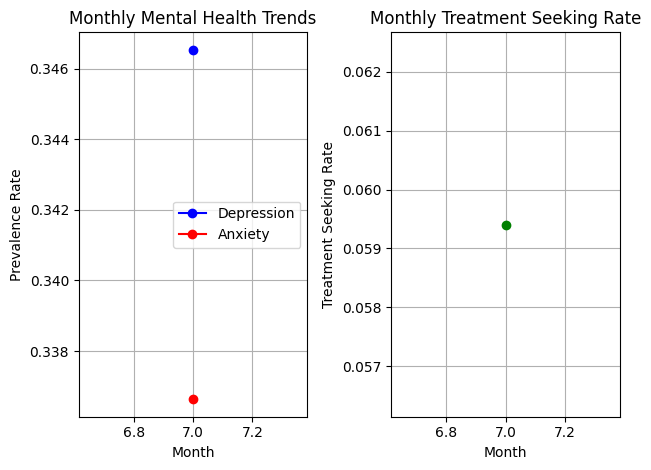

In [364]:
# Plot 1 and 2
def plot_monthly_trends(monthly_data):
    """
    Plots monthly trends for mental health prevalence and treatment-seeking behavior.

    Steps:
    1. Plot 1: Monthly Depression and Anxiety Trends
       - Line plot showing the monthly trends for depression and anxiety prevalence rates.
       - Uses 'month' as the x-axis.
       - Plots 'depression_mean' (blue) and 'anxiety_mean' (red) with circle markers.
       - Adds a title, axis labels, legend, and grid.

    2. Plot 2: Monthly Treatment Seeking Behavior
       - Line plot showing the monthly trend for the treatment-seeking rate.
       - Uses 'month' as the x-axis.
       - Plots 'sought_treatment_mean' (green) with circle markers.
       - Adds a title, axis labels, and grid.

    3. Adjust layout and display the plots.

    Arguments:
    monthly_data: pandas DataFrame
        The DataFrame containing the monthly data with the required columns:
        'month', 'depression_mean', 'anxiety_mean', and 'sought_treatment_mean'.

    Returns:
    None
    """
    # Plot 1: Monthly Depression and Anxiety Trends
    plt.subplot(1, 2, 1)
    plt.plot(monthly_data['month'], monthly_data['depression_mean'], 'b-o', label='Depression')
    plt.plot(monthly_data['month'], monthly_data['anxiety_mean'], 'r-o', label='Anxiety')
    plt.title('Monthly Mental Health Trends')
    plt.xlabel('Month')
    plt.ylabel('Prevalence Rate')
    plt.legend()
    plt.grid(True)

    # Plot 2: Monthly Treatment Seeking Behavior
    plt.subplot(1, 2, 2)
    plt.plot(monthly_data['month'], monthly_data['sought_treatment_mean'], 'g-o')
    plt.title('Monthly Treatment Seeking Rate')
    plt.xlabel('Month')
    plt.ylabel('Treatment Seeking Rate')
    plt.grid(True)

    # Adjust layout and display the plots
    plt.tight_layout()
    plt.show()

# Apply the function
plot_monthly_trends(monthly_comparison)



Plot 3 illustrates global trends in various mental health disorders from 1990 to 2020. Anxiety disorders consistently show the highest prevalence rate at around 4%, followed by depressive disorders at approximately 3.7%, while schizophrenia, bipolar, and eating disorders show lower but stable rates below 1%.

The trends remain remarkably stable over the 30-year period, with only slight variations. This suggests that these mental health conditions are persistent global health challenges that haven't seen significant changes in prevalence despite advances in treatment and awareness.

# **Visualization 2**

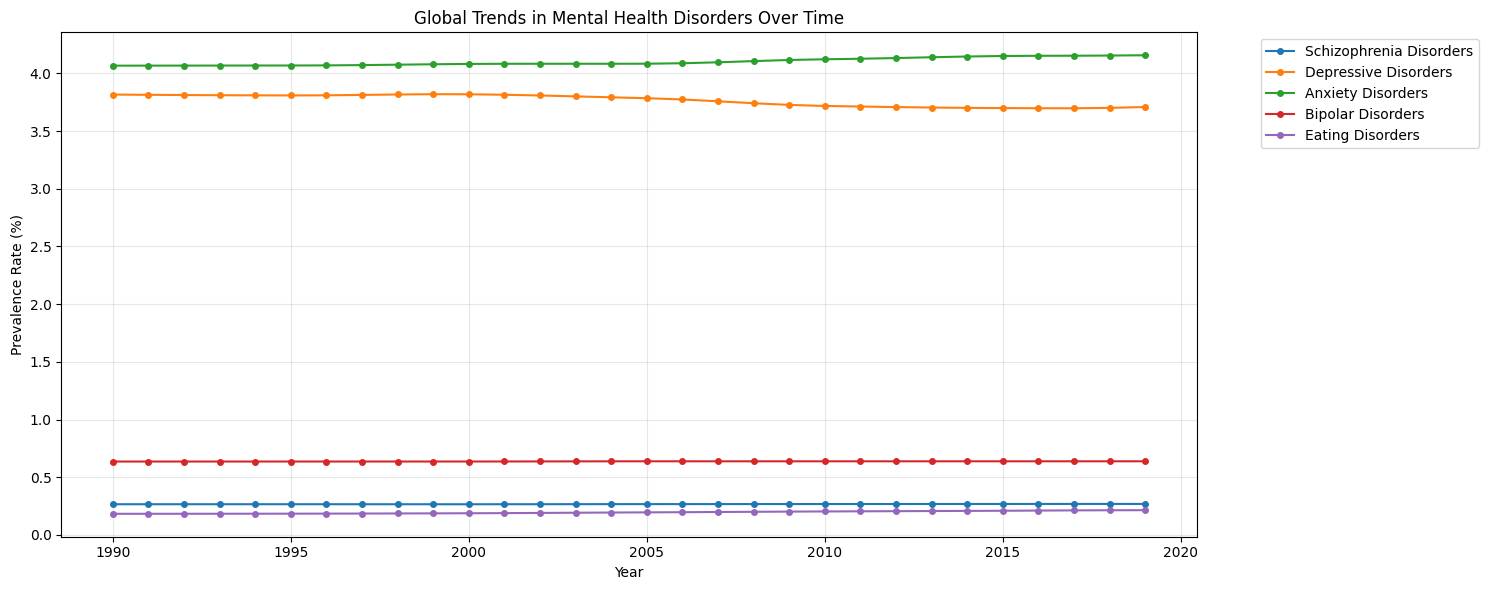

In [365]:
# Plot 3
def plot_global_mental_health_trends(data, disorders):
    """
    Plots the global trends of different mental health disorders over time.

    Steps:
    1. Calculate yearly averages:
       - Group the data by 'year' and calculate the mean prevalence rate for each disorder.

    2. Plot each disorder's trend:
       - Use a line plot for each disorder.
       - Add markers and format labels by replacing underscores with spaces and capitalizing each word.

    3. Add plot aesthetics:
       - Title: 'Global Trends in Mental Health Disorders Over Time'.
       - X-axis label: 'Year'.
       - Y-axis label: 'Prevalence Rate (%)'.
       - Legend positioned outside the plot on the right.
       - Grid with transparency.

    4. Adjust layout for better display and show the plot.

    Arguments:
    data: pandas DataFrame
        The DataFrame containing global mental health data.
    disorders: list of str
        A list of column names representing different mental health disorders to plot.

    Returns:
    None
    """
    plt.figure(figsize=(15, 6))

    # Calculate global average for each disorder by year
    yearly_trends = data.groupby('year')[disorders].mean()

    # Plot each disorder
    for disorder in disorders:
        plt.plot(yearly_trends.index, yearly_trends[disorder],
                 marker='o', markersize=4,
                 label=disorder.replace('_', ' ').title())

    # Add plot aesthetics
    plt.title('Global Trends in Mental Health Disorders Over Time')
    plt.xlabel('Year')
    plt.ylabel('Prevalence Rate (%)')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# Define the disorders to plot
disorders = ['schizophrenia_disorders', 'depressive_disorders',
             'anxiety_disorders', 'bipolar_disorders', 'eating_disorders']

# Apply the function
plot_global_mental_health_trends(df_2, disorders)


Plot 4 displays the distribution of total mental health burden across different severity levels and development status. The violin plots show increasing mental health burden from low to high severity levels, with the distribution becoming wider and higher as severity increases, reaching up to 14% burden in the high severity category.

There are notable differences between developed and developing countries across severity levels, particularly in the high severity category where developed countries show a slightly different distribution pattern. This suggests that development status plays a role in how mental health burden is distributed and possibly managed.

# **Visualization 3**

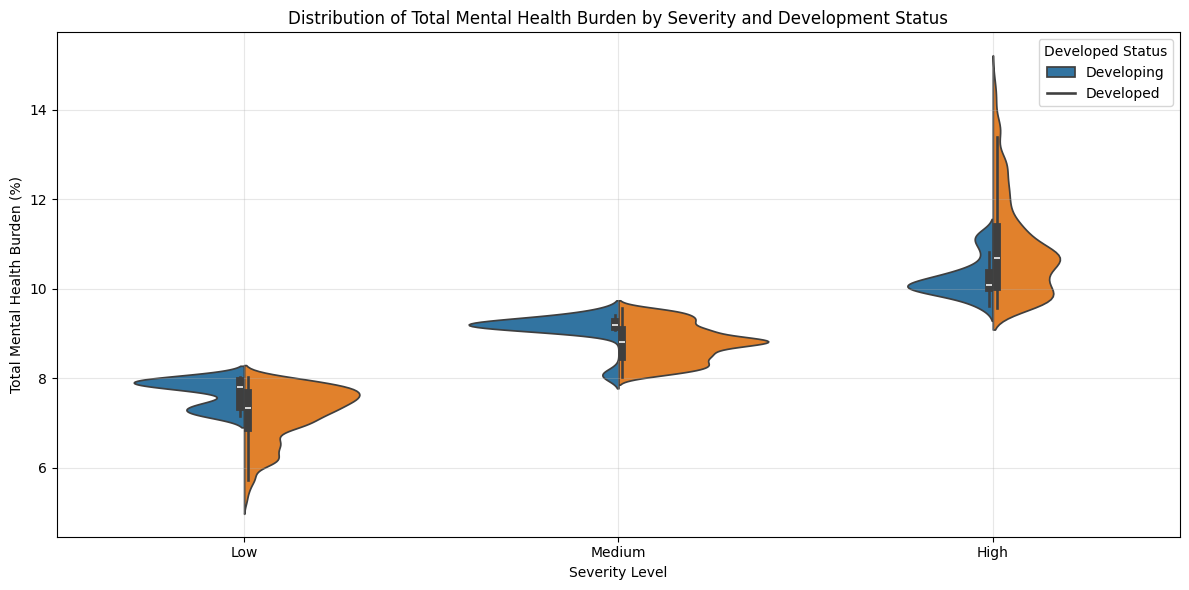

In [366]:
# Plot 4
def plot_mental_burden_distribution(data, severity_col, burden_col, hue_col):
    """
    Plots the distribution of total mental health burden by severity level and development status.

    Steps:
    1. Create a violin plot:
       - X-axis: Severity levels (e.g., 'Low', 'Medium', 'High').
       - Y-axis: Total mental health burden percentages.
       - Hue: Development status (e.g., 'Developing', 'Developed').
       - Split the violins to compare distributions for each development status.

    2. Add plot aesthetics:
       - Title: 'Distribution of Total Mental Health Burden by Severity and Development Status'.
       - X-axis label: 'Severity Level'.
       - Y-axis label: 'Total Mental Health Burden (%)'.
       - Legend title: 'Developed Status' with appropriate labels for categories.
       - Grid with transparency.

    3. Adjust layout for better display and show the plot.

    Arguments:
    data: pandas DataFrame
        The DataFrame containing mental health burden data.
    severity_col: str
        The column name representing severity levels.
    burden_col: str
        The column name representing total mental health burden percentages.
    hue_col: str
        The column name representing development status.

    Returns:
    None
    """
    plt.figure(figsize=(12, 6))

    # Create a violin plot
    sns.violinplot(data=data, x=severity_col, y=burden_col, hue=hue_col, split=True)
    plt.title('Distribution of Total Mental Health Burden by Severity and Development Status')
    plt.xlabel('Severity Level')
    plt.ylabel('Total Mental Health Burden (%)')
    plt.legend(title='Developed Status', labels=['Developing', 'Developed'])
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# Apply the function
plot_mental_burden_distribution(df_2, 'severity_level', 'total_mental_burden', 'is_developed')


Plot 5 presents a stacked bar chart of the top 15 countries with the highest mental health burden as of 2019. Portugal leads with the highest total burden of around 14%, followed by New Zealand and Iran, with Paraguay showing the lowest burden among the top 15 at approximately 11.5%.

The composition of mental health disorders varies across countries, but anxiety disorders (green) consistently form the largest portion of the burden, followed by depressive disorders (orange). The variation in the size and composition of these bars suggests that different countries face different challenges in their mental health burden.

# **Visualization 4**

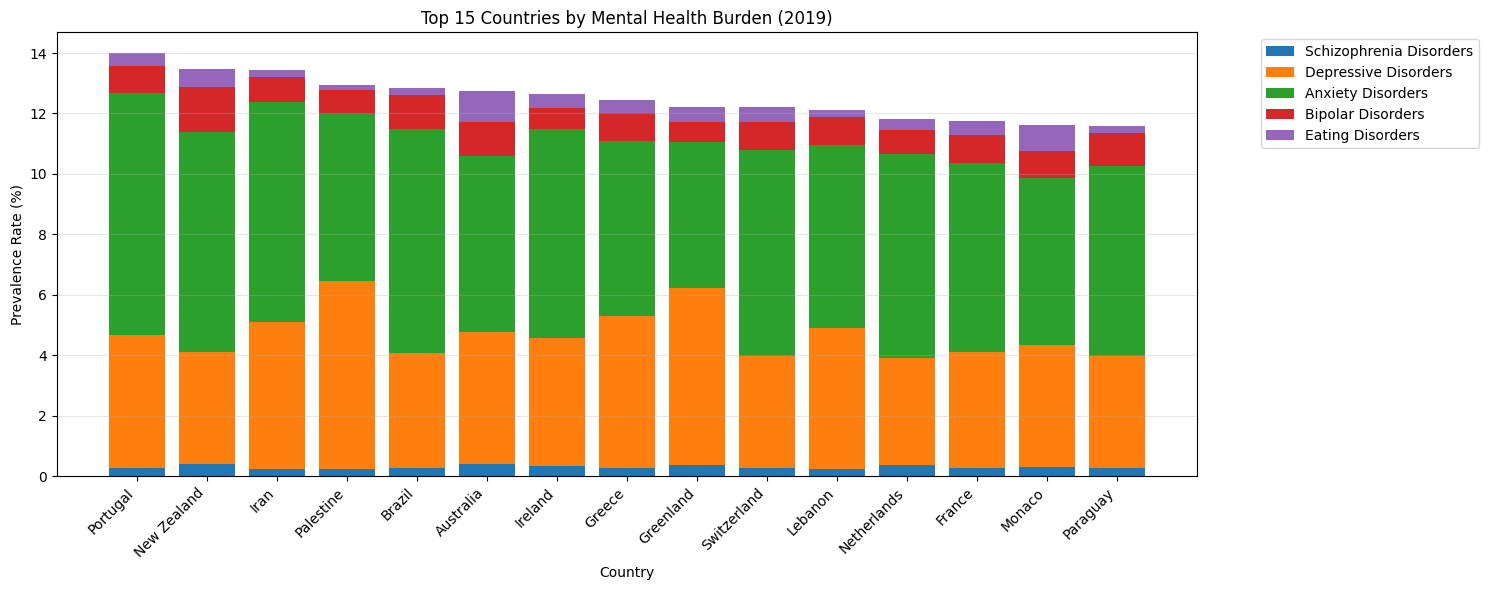

In [367]:
# Plot 5
def plot_top_countries_mental_health_burden(data, disorders, year_col, burden_col, country_col, n=15):
    """
    Plots the top N countries with the highest mental health burden for the most recent year.

    Steps:
    1. Identify the most recent year in the data:
       - Find the maximum value in the year column.

    2. Select the top N countries by total mental health burden:
       - Filter the data for the most recent year.
       - Sort by total mental burden and select the top N rows.

    3. Create a stacked bar chart:
       - X-axis: Top N countries.
       - Y-axis: Prevalence rates of different disorders stacked on top of each other.
       - Use the disorders as individual segments in the stacked bars.
       - Add labels and legends with formatted disorder names.

    4. Add plot aesthetics:
       - Title indicating the year of analysis.
       - X-axis label: 'Country'.
       - Y-axis label: 'Prevalence Rate (%)'.
       - X-axis ticks rotated for readability.
       - Grid on the y-axis for better visualization.

    5. Adjust layout and display the plot.

    Arguments:
    data: pandas DataFrame
        The DataFrame containing mental health data.
    disorders: list of str
        A list of disorder column names to include in the stacked bar chart.
    year_col: str
        The column name representing the year.
    burden_col: str
        The column name representing the total mental health burden.
    country_col: str
        The column name representing the country/entity.
    n: int, optional (default=15)
        The number of top countries to display.

    Returns:
    None
    """
    plt.figure(figsize=(15, 6))

    # Identify the most recent year
    recent_year = data[year_col].max()

    # Select top N countries by total mental health burden
    top_countries = data[data[year_col] == recent_year].nlargest(n, burden_col)

    # Create stacked bar chart
    bottom = np.zeros(n)
    for disorder in disorders:
        plt.bar(range(n), top_countries[disorder], bottom=bottom,
                label=disorder.replace('_', ' ').title())
        bottom += top_countries[disorder]

    # Add plot aesthetics
    plt.title(f'Top {n} Countries by Mental Health Burden ({recent_year})')
    plt.xlabel('Country')
    plt.ylabel('Prevalence Rate (%)')
    plt.xticks(range(n), top_countries[country_col], rotation=45, ha='right')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()

# Define the list of disorders to include in the stacked bar chart
disorders = ['schizophrenia_disorders', 'depressive_disorders',
             'anxiety_disorders', 'bipolar_disorders', 'eating_disorders']

# Apply the function
plot_top_countries_mental_health_burden(
    df_2, disorders, 'year', 'total_mental_burden', 'entity', n=15
)


# **Conclusion**

Comparing the data obtained from the students and the global population allows identifying several critical aspects concerning the patterns of mental health and the willingness to seek help. The examination of the dynamics in the frequency of mental health disorders on the global level indicates the time invariance in terms of the most common diseases, namely anxiety and depression. However, the patterns of mental health among students differ from the global trends, which implies that there are special difficulties in learning environments.

There is a significant void in mental health service, where students reaching out for professional assistance to their mental health problems is at 6%. This low rate of treatment-seeking behavior is an indication of a critical area of need for improvement in academic support systems. The data also shows that students’ mental health cannot be attributed to academic performance hence students from all academic background have mental health issues.

The global perspective is another important aspect of the study because it helps to identify peculiarities of the distribution of mental health burden in different countries with the reference to the development status of the countries and the ways through which people manage their mental health issues. The results suggest differences between developed and developing countries, which means that mental health support approaches should take into account the national and international context. Portugal, New Zealand, and Iran have higher total mental health burden but the distribution of these burdens is not similar among these countries.

Based on these findings, there is a dire call for improved mental health care and assistance in learning institutions. The current strategies of identifying students with mental health problems are inadequate, and schools and universities should increase the extent of their screening and intervention activities because students, performance is not indicative of their mental health. Future studies should also attempt to look at other barriers to the students, mental health and ways of reducing the culture of how students seek help for their mental health. This research brings out the fact that mental health problems are multifaceted in schools and calls for creating effective intervention strategies for mental health problems that are both local and global.